# CornishMBHdemo
Demo using pandas packaging of MBH chain files provided by Neil Cornish

In [4]:
# Import modules
import os
import glob
import pandas as pd
import numpy as np    
from astropy.coordinates import SkyCoord
from astropy import units as u
import ligo.skymap.plot
import matplotlib.pyplot as plt
import corner
import seaborn as sns
import sys
sys.path.insert(1, '/home/centos/codes/ldasoft/gbmcmc/scripts')
import lisacattools as lisacat
%matplotlib inline

In [11]:
catPath = '/home/centos/Data'   # output path for the pandas catalogs
catFiles = glob.glob(catPath + '/MBH_wk*.h5')
dfs = list()

# You read individual DataFrames out by specifying the key parameter. Here is metadata
for catFile in catFiles:
    df = pd.read_hdf(catFile, key = 'metadata')
    df['location'] = catFile
    dfs.append(df) 
meta  = pd.concat(dfs)
meta = meta.sort_values(by='observation week')
meta


,author,creation date,observation week,parent,location
MBHcatalog_week001,Neil Cornish,2020-12-03 16:12:43,1.0,None,/home/centos/Data/MBH_wk001.h5
MBHcatalog_week003,Neil Cornish,2020-12-03 16:12:43,3.0,MBHcatalog_week001,/home/centos/Data/MBH_wk003.h5
MBHcatalog_week004,Neil Cornish,2020-12-03 16:12:44,4.0,MBHcatalog_week003,/home/centos/Data/MBH_wk004.h5
MBHcatalog_week005,Neil Cornish,2020-12-03 16:12:45,5.0,MBHcatalog_week004,/home/centos/Data/MBH_wk005.h5
MBHcatalog_week006,Neil Cornish,2020-12-03 16:12:46,6.0,MBHcatalog_week005,/home/centos/Data/MBH_wk006.h5
MBHcatalog_week007,Neil Cornish,2020-12-03 16:12:48,7.0,MBHcatalog_week006,/home/centos/Data/MBH_wk007.h5
MBHcatalog_week008,Neil Cornish,2020-12-03 16:12:50,8.0,MBHcatalog_week007,/home/centos/Data/MBH_wk008.h5
MBHcatalog_week009,Neil Cornish,2020-12-03 16:12:52,9.0,MBHcatalog_week008,/home/centos/Data/MBH_wk009.h5
MBHcatalog_week010,Neil Cornish,2020-12-03 16:12:54,10.0,MBHcatalog_week009,/home/centos/Data/MBH_wk010.h5
MBHcatalog_week011,Neil Cornish,2020-12-03 16:12:56,11.0,MBHcatalog_week010,/home/centos/Data/MBH_wk011.h5


In [18]:
# load the detections 
catIdx = 12
catRoot = os.path.split(os.path.splitext(catFiles[catIdx])[0])[1] # string for naming plots
catFile = meta.iloc[catIdx]['location']
cat = pd.read_hdf(catFile, key='detections')
cat

,log likelihood,mass 1,mass 2,spin 1,spin 2,merger phase,barycenter merge time,luminosity distance,cos ecliptic colatitude,ecliptic longitude,polarization,cos inclination,detector merger time,parent,chain file
source number,,,,,,,,,,,,,,,
MBH0006,527.595085,132558.204255,33332.942037,0.857195,0.585346,1.566156,1.131708e+07,14.264659,0.675707,4.247968,1.572822,-0.838600,11317140.0,MBH0006,MBH_wk014.h5
MBH0015,54.379504,6001.422667,1492.767832,0.798989,0.506167,1.569554,1.099315e+07,23.122989,0.161062,0.563473,1.548637,-0.669363,10993180.0,MBH0015,MBH_wk014.h5


In [19]:
sourceIdx = cat.index[0]
source = lisacat.getChain(cat,sourceIdx,catPath)
source.head()

,log likelihood,mass 1,mass 2,spin 1,spin 2,merger phase,barycenter merge time,luminosity distance,cos ecliptic colatitude,ecliptic longitude,polarization,cos inclination,detector merger time
iteration,,,,,,,,,,,,,
20,529.776401,85366.197434,48142.640996,0.979292,0.982404,0.712319,1.132100e+07,13.872458,0.935504,4.364162,0.673110,-0.915348,11321090.0
21,529.388419,84999.974334,48329.234593,0.981661,0.979725,1.886488,1.132100e+07,13.608138,0.929765,4.355883,2.643992,-0.904321,11321090.0
22,529.884385,88040.915420,46854.560424,0.998282,0.992780,0.702139,1.132100e+07,13.735120,0.931385,4.356800,0.669758,-0.929936,11321090.0
23,530.266799,85244.203398,48204.924704,0.979654,0.984094,0.731827,1.132100e+07,13.532413,0.949089,4.340562,0.678905,-0.946925,11321080.0
40,528.951010,85743.982168,47955.248629,0.982000,0.983660,1.101259,1.132100e+07,14.649034,0.932572,4.380529,0.308063,-0.941300,11321090.0


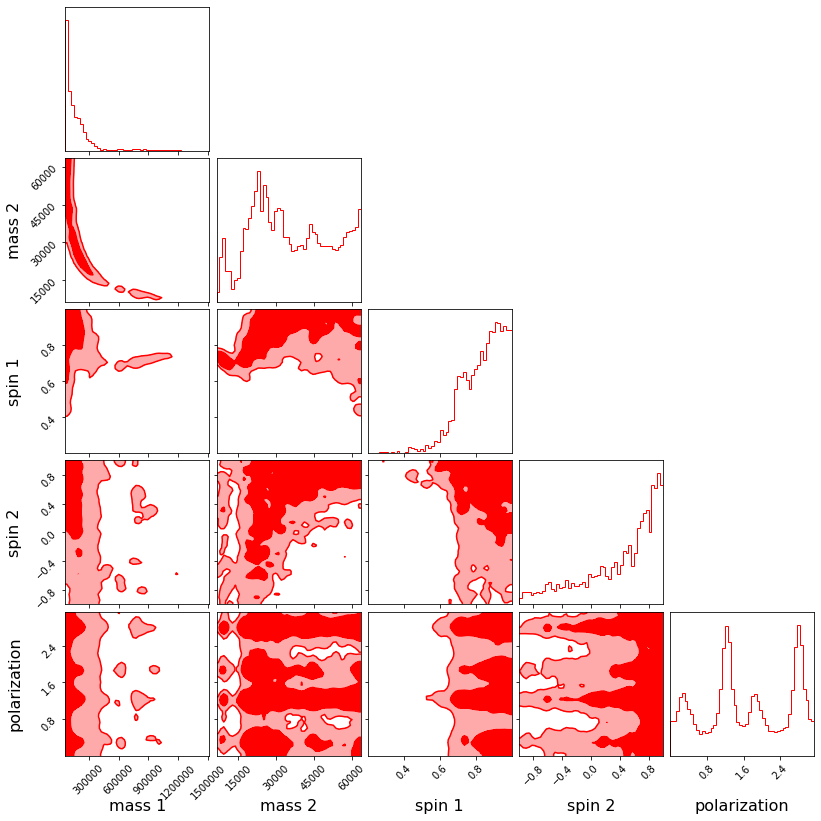

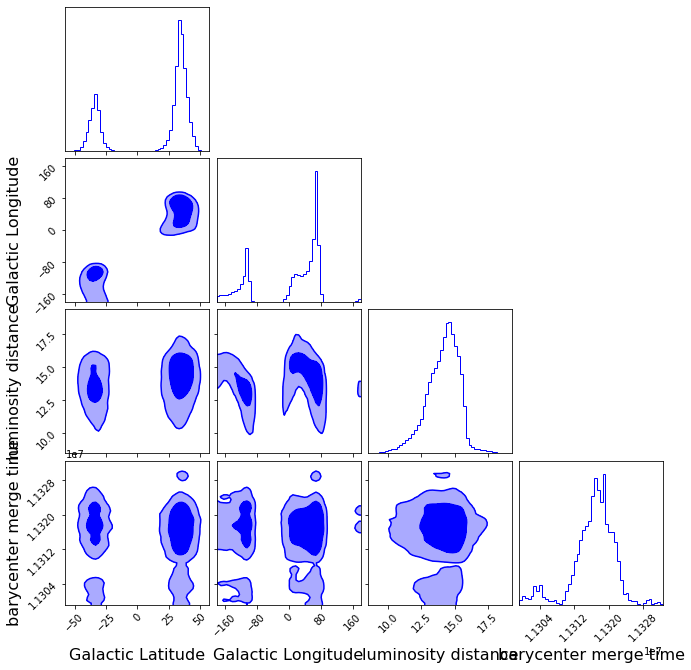

In [24]:
# intrinsic parameters
inParams = ['mass 1','mass 2', 'spin 1', 'spin 2','polarization']
figIn = corner.corner(source[inParams], color='red', plot_datapoints=False, fill_contours=True, bins=50, smooth=1.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16});
outParams = ['Galactic Latitude','Galactic Longitude','luminosity distance','barycenter merge time']
figOut = corner.corner(source[outParams], color='blue', plot_datapoints=False, fill_contours=True, bins=50, smooth=1.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16});


In [20]:
nside = 64
lisacat.getGalcoord(source)
lisacat.HPbin(source,nside,'Galactic')
source

,log likelihood,mass 1,mass 2,spin 1,spin 2,merger phase,barycenter merge time,luminosity distance,cos ecliptic colatitude,ecliptic longitude,polarization,cos inclination,detector merger time,Galactic Longitude,Galactic Latitude,HEALPix bin
iteration,,,,,,,,,,,,,,,,
20,529.776401,85366.197434,48142.640996,0.979292,0.982404,0.712319,1.132100e+07,13.872458,0.935504,4.364162,0.673110,-0.915348,11321090.0,72.597137,34.744731,10675
21,529.388419,84999.974334,48329.234593,0.981661,0.979725,1.886488,1.132100e+07,13.608138,0.929765,4.355883,2.643992,-0.904321,11321090.0,71.519906,35.026277,10419
22,529.884385,88040.915420,46854.560424,0.998282,0.992780,0.702139,1.132100e+07,13.735120,0.931385,4.356800,0.669758,-0.929936,11321090.0,71.824349,34.976203,10419
23,530.266799,85244.203398,48204.924704,0.979654,0.984094,0.731827,1.132100e+07,13.532413,0.949089,4.340562,0.678905,-0.946925,11321080.0,75.483621,34.843889,10422
40,528.951010,85743.982168,47955.248629,0.982000,0.983660,1.101259,1.132100e+07,14.649034,0.932572,4.380529,0.308063,-0.941300,11321090.0,71.983357,34.465299,10675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,526.204536,65852.558299,61294.231586,0.865892,0.632311,1.521018,1.131550e+07,15.204790,0.471378,4.078700,1.065525,-0.888711,11315610.0,18.284552,43.467322,7576
1000000,525.299346,65810.425142,61369.852128,0.691941,0.970745,0.630550,1.131620e+07,12.557974,0.946089,4.766332,1.097984,-0.830069,11316330.0,75.125407,27.091702,13237
1000001,526.401319,87364.525644,47032.031723,0.901529,0.125041,1.014642,1.131284e+07,14.678745,0.918728,4.402491,0.894764,-0.927420,11312950.0,69.404798,34.159116,10673


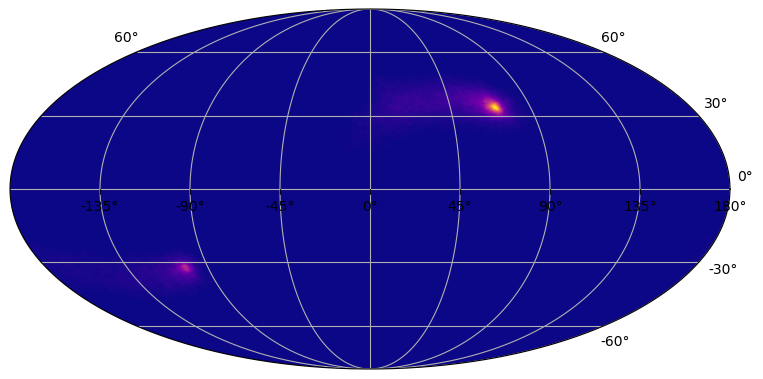

In [21]:
# all sky map
hpmap = lisacat.HPhist(source,nside)
fig = plt.figure(figsize=(8, 6), dpi=100)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    projection='geo degrees mollweide')
ax.grid()
ax.imshow_hpx(hpmap, cmap='plasma')
